<a href="https://colab.research.google.com/github/ArunK-ML/Project---Nutrition-Paradox-A-Global-View-on-Obesity-and-Malnutrition/blob/main/Nutrition_Paradox_MySQL_Quries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **⚖️ Nutrition Paradox: A Global View on Obesity and Malnutrition**

In [ ]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.3 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd
import pycountry

# -----------------------------
# Step 1: Fetch Data from APIs
# -----------------------------
url_Obesity_adults = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
url_Obesity_children = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
url_Malnutrition_adults = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
url_Malnutrition_children = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

response1 = requests.get(url_Obesity_adults)
response2 = requests.get(url_Obesity_children)
response3 = requests.get(url_Malnutrition_adults)
response4 = requests.get(url_Malnutrition_children)

Obesity_adults = response1.json()
Obesity_children = response2.json()
Malnutrition_adults = response3.json()
Malnutrition_children = response4.json()

# -----------------------------
# Step 2: Convert JSON to DataFrames
# -----------------------------
Obesity_adults_df = pd.DataFrame(Obesity_adults["value"])
Obesity_children_df = pd.DataFrame(Obesity_children["value"])
Malnutrition_adults_df = pd.DataFrame(Malnutrition_adults["value"])
Malnutrition_children_df = pd.DataFrame(Malnutrition_children["value"])

# Add "age_group" column
Obesity_adults_df["age_group"] = "Adult"
Obesity_children_df["age_group"] = "Child"
Malnutrition_adults_df["age_group"] = "Adult"
Malnutrition_children_df["age_group"] = "Child"

# -----------------------------
# Step 3: Combine datasets
# -----------------------------
df_obesity = pd.concat([Obesity_adults_df, Obesity_children_df], ignore_index=True)
df_malnutrition = pd.concat([Malnutrition_adults_df, Malnutrition_children_df], ignore_index=True)

# -----------------------------
# Step 4: Select and Rename Columns
# -----------------------------
columns_map = {
    "ParentLocationCode": "Region",
    "Dim1": "Gender",
    "TimeDim": "Year",
    "Low": "LowerBound",
    "High": "UpperBound",
    "NumericValue": "Mean_Estimate",
    "SpatialDim": "Country"
}

selected_cols = list(columns_map.keys()) + ["age_group"]

df_obesity_subset = df_obesity[selected_cols].rename(columns=columns_map)
df_malnutrition_subset = df_malnutrition[selected_cols].rename(columns=columns_map)

# -----------------------------
# Step 5: Data Type Conversion
# -----------------------------

df_obesity_subset["Year"] = df_obesity_subset["Year"].astype(int)
df_malnutrition_subset["Year"] = df_malnutrition_subset["Year"].astype(int)

# -----------------------------
# Step 6: Filter Year 2012–2022
# -----------------------------
df_obesity_subset_filter = df_obesity_subset[
    (df_obesity_subset["Year"] >= 2012) & (df_obesity_subset["Year"] <= 2022)
].reset_index(drop=True)

df_malnutrition_subset_filter = df_malnutrition_subset[
    (df_malnutrition_subset["Year"] >= 2012) & (df_malnutrition_subset["Year"] <= 2022)
].reset_index(drop=True)

# -----------------------------
# Step 7: Replace Gender Codes
# -----------------------------
gender_map = {
    "SEX_FMLE": "Female",
    "SEX_BTSX": "Both",
    "SEX_MLE": "Male"
}

df_obesity_subset_filter.loc[:, "Gender"] = df_obesity_subset_filter["Gender"].replace(gender_map)
df_malnutrition_subset_filter.loc[:, "Gender"] = df_malnutrition_subset_filter["Gender"].replace(gender_map)

# -----------------------------
# Step 8: Replace Country Codes with Country Names (in-place)
# -----------------------------
def code_to_country(code):
    try:
        return pycountry.countries.lookup(code).name
    except:
        # Fallback mapping for special WHO or WB codes
        special_codes = {
            'GLOBAL': 'Global',
            'WB_LMI': 'Low & Middle Income',
            'WB_HI': 'High Income',
            'WB_LI': 'Low Income',
            'EMR': 'Eastern Mediterranean Region',
            'EUR': 'Europe',
            'AFR': 'Africa',
            'SEAR': 'South-East Asia Region',
            'WPR': 'Western Pacific Region',
            'AMR': 'Americas Region',
            'WB_UMI': 'Upper Middle Income',
            'WLD': 'World',
            'ENG': 'England',
            'SCT': 'Scotland',
            'XK': 'Kosovo',
            'WLS': 'Wales',
            'NIR': 'Northern Ireland',
            'PS': 'Palestine',
            'EU': 'European Union'
        }
        return special_codes.get(code, "Unknown")

df_obesity_subset_filter["Country"] = df_obesity_subset_filter["Country"].apply(code_to_country)
df_malnutrition_subset_filter["Country"] = df_malnutrition_subset_filter["Country"].apply(code_to_country)

# -----------------------------
# Step 9: Output Preview
# -----------------------------
print("✅ Obesity Data (2012–2022):")
print(df_obesity_subset_filter.head())

print("\n✅ Malnutrition Data (2012–2022):")
print(df_malnutrition_subset_filter.head())


✅ Obesity Data (2012–2022):
  Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
0    EMR    Male  2020   15.793777   19.245727      17.487641   
1    EMR    Male  2020   23.089589   33.815336      28.335530   
2    EUR  Female  2014   24.924766   31.213260      27.948704   
3    EUR  Female  2019   28.160682   35.574925      31.893221   
4    EUR    Both  2018   29.905805   37.470856      33.694205   

                     Country age_group  
0  Iran, Islamic Republic of     Adult  
1                       Iraq     Adult  
2                  Greenland     Adult  
3                    Armenia     Adult  
4                      Malta     Adult  

✅ Malnutrition Data (2012–2022):
  Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
0    AFR  Female  2021    3.972036    8.077021       5.795110   
1    WPR    Both  2017    2.428230    3.842155       3.090652   
2    AFR  Female  2016    6.655668   10.253121       8.371724   
3   None    Both  2021   12.242323   14.4

# **New Columns Create**

1. **age_group**: Manually assign this column based on the dataset source.
■ Use "Adult" for datasets NCD_BMI_30C and NCD_BMI_18C.
■ Use "Child/Adolescent" for datasets NCD_BMI_PLUS2C and
NCD_BMI_MINUS2C.

In [ ]:
# 2. CI_Width: Calculate the confidence interval width.
#     Formula: CI_Width = High - Low

df_obesity_subset_filter["CI_Width"] = df_obesity_subset_filter["UpperBound"] - df_obesity_subset_filter["LowerBound"]

df_malnutrition_subset_filter["CI_Width"] = df_malnutrition_subset_filter["UpperBound"] - df_malnutrition_subset_filter["LowerBound"]



In [ ]:
df_obesity_subset_filter

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width
0,EMR,Male,2020,15.793777,19.245727,17.487641,"Iran, Islamic Republic of",Adult,3.451950
1,EMR,Male,2020,23.089589,33.815336,28.335530,Iraq,Adult,10.725747
2,EUR,Female,2014,24.924766,31.213260,27.948704,Greenland,Adult,6.288494
3,EUR,Female,2019,28.160682,35.574925,31.893221,Armenia,Adult,7.414243
4,EUR,Both,2018,29.905805,37.470856,33.694205,Malta,Adult,7.565051
...,...,...,...,...,...,...,...,...,...
27715,EUR,Both,2020,0.964176,2.197432,1.475931,Tajikistan,Child,1.233255
27716,EMR,Female,2012,0.302039,5.872414,1.966190,Somalia,Child,5.570375
27717,WPR,Male,2021,3.325899,34.877816,16.634887,Vanuatu,Child,31.551917
27718,AFR,Male,2014,0.236481,6.341185,2.032189,Madagascar,Child,6.104704


In [ ]:
df_malnutrition_subset_filter

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width
0,AFR,Female,2021,3.972036,8.077021,5.795110,Gabon,Adult,4.104985
1,WPR,Both,2017,2.428230,3.842155,3.090652,Mongolia,Adult,1.413925
2,AFR,Female,2016,6.655668,10.253121,8.371724,Sierra Leone,Adult,3.597453
3,None,Both,2021,12.242323,14.442866,13.336353,South-East Asia Region,Adult,2.200543
4,EMR,Male,2014,1.253843,3.516819,2.208070,Qatar,Adult,2.262976
...,...,...,...,...,...,...,...,...,...
27715,AMR,Female,2013,2.795499,5.714345,4.140693,Haiti,Child,2.918846
27716,EUR,Both,2018,5.428173,10.218395,7.574986,Tajikistan,Child,4.790222
27717,WPR,Both,2016,0.621721,3.507061,1.703645,Papua New Guinea,Child,2.885340
27718,WPR,Female,2020,0.064152,2.810176,0.734066,Samoa,Child,2.746023


In [ ]:
# obesity_level (for the obesity table only):

# Define conditions and choices
import numpy as np

obesity_conditions = [
    df_obesity_subset_filter["Mean_Estimate"] >= 30,
    (df_obesity_subset_filter["Mean_Estimate"] >= 25) & (df_obesity_subset_filter["Mean_Estimate"] < 29.9),
    df_obesity_subset_filter["Mean_Estimate"] < 25
]
obesity_choices = ['High', 'Moderate', 'Low']

# Create new column

df_obesity_subset_filter["obesity_level"] = np.select(obesity_conditions, obesity_choices, default='Unknown')

In [ ]:
df_obesity_subset_filter

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,obesity_level
0,EMR,Male,2020,15.793777,19.245727,17.487641,"Iran, Islamic Republic of",Adult,3.451950,Low
1,EMR,Male,2020,23.089589,33.815336,28.335530,Iraq,Adult,10.725747,Moderate
2,EUR,Female,2014,24.924766,31.213260,27.948704,Greenland,Adult,6.288494,Moderate
3,EUR,Female,2019,28.160682,35.574925,31.893221,Armenia,Adult,7.414243,High
4,EUR,Both,2018,29.905805,37.470856,33.694205,Malta,Adult,7.565051,High
...,...,...,...,...,...,...,...,...,...,...
27715,EUR,Both,2020,0.964176,2.197432,1.475931,Tajikistan,Child,1.233255,Low
27716,EMR,Female,2012,0.302039,5.872414,1.966190,Somalia,Child,5.570375,Low
27717,WPR,Male,2021,3.325899,34.877816,16.634887,Vanuatu,Child,31.551917,Low
27718,AFR,Male,2014,0.236481,6.341185,2.032189,Madagascar,Child,6.104704,Low


In [ ]:
# malnutrition_level (for the malnutrition table only):

# Define conditions and choices
import numpy as np

malnutrition_conditions = [
    df_malnutrition_subset_filter["Mean_Estimate"] >= 20,
    (df_malnutrition_subset_filter["Mean_Estimate"] >= 10) & (df_malnutrition_subset_filter["Mean_Estimate"] < 19.9),
    df_malnutrition_subset_filter["Mean_Estimate"] < 10
]
malnutrition_choices = ['High', 'Moderate', 'Low']

# Create new column

df_malnutrition_subset_filter["malnutrition_level"] = np.select(malnutrition_conditions, malnutrition_choices, default='Unknown')

In [ ]:
df_malnutrition_subset_filter

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
0,AFR,Female,2021,3.972036,8.077021,5.795110,Gabon,Adult,4.104985,Low
1,WPR,Both,2017,2.428230,3.842155,3.090652,Mongolia,Adult,1.413925,Low
2,AFR,Female,2016,6.655668,10.253121,8.371724,Sierra Leone,Adult,3.597453,Low
3,None,Both,2021,12.242323,14.442866,13.336353,South-East Asia Region,Adult,2.200543,Moderate
4,EMR,Male,2014,1.253843,3.516819,2.208070,Qatar,Adult,2.262976,Low
...,...,...,...,...,...,...,...,...,...,...
27715,AMR,Female,2013,2.795499,5.714345,4.140693,Haiti,Child,2.918846,Low
27716,EUR,Both,2018,5.428173,10.218395,7.574986,Tajikistan,Child,4.790222,Low
27717,WPR,Both,2016,0.621721,3.507061,1.703645,Papua New Guinea,Child,2.885340,Low
27718,WPR,Female,2020,0.064152,2.810176,0.734066,Samoa,Child,2.746023,Low


In [ ]:
df_obesity_subset_filter.to_csv('df_obesity_subset_filter.csv', index=False)
df_malnutrition_subset_filter.to_csv('df_malnutrition_subset_filter.csv', index=False)

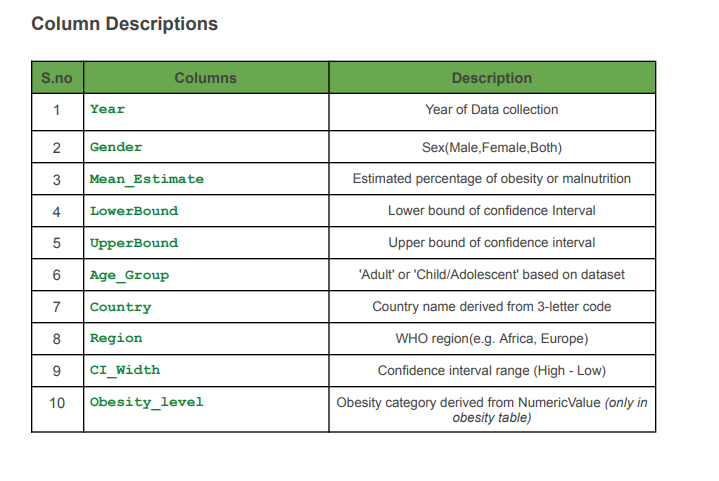

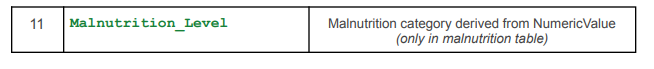

# **Step:3 🧮 Exploratory Data Analysis (EDA) with Python**


# **Pandas - Analyzing DataFrames**

In [ ]:
print("Obesity Data Shape:", df_obesity_subset_filter.shape)
print("Malnutrition Data Shape:", df_malnutrition_subset_filter.shape)

Obesity Data Shape: (27720, 10)
Malnutrition Data Shape: (27720, 10)


In [ ]:
df_obesity_subset_filter.head() , df_malnutrition_subset_filter.head()

(  Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
 0    EMR    Male  2020   15.793777   19.245727      17.487641   
 1    EMR    Male  2020   23.089589   33.815336      28.335530   
 2    EUR  Female  2014   24.924766   31.213260      27.948704   
 3    EUR  Female  2019   28.160682   35.574925      31.893221   
 4    EUR    Both  2018   29.905805   37.470856      33.694205   
 
                      Country age_group   CI_Width obesity_level  
 0  Iran, Islamic Republic of     Adult   3.451950           Low  
 1                       Iraq     Adult  10.725747      Moderate  
 2                  Greenland     Adult   6.288494      Moderate  
 3                    Armenia     Adult   7.414243          High  
 4                      Malta     Adult   7.565051          High  ,
   Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
 0    AFR  Female  2021    3.972036    8.077021       5.795110   
 1    WPR    Both  2017    2.428230    3.842155       3.090652   
 

In [ ]:
print("\nObesity Data Info:")
df_obesity_subset_filter.info()

print("\nMalnutrition Data Info:")
df_malnutrition_subset_filter.info()


Obesity Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         26268 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.1+ MB

Malnutrition Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              26268 non-null  object 


In [ ]:
# Missing values in Obesity Data

print("Missing Values (Obesity):")
print(df_obesity_subset_filter.isnull().sum())

print("\nMissing Values (Malnutrition):")
print(df_malnutrition_subset_filter.isnull().sum())

Missing Values (Obesity):
Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64

Missing Values (Malnutrition):
Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
age_group                0
CI_Width                 0
malnutrition_level       0
dtype: int64


In [ ]:
# Descriptive statistics for Obesity

print(df_obesity_subset_filter.describe())

# Descriptive statistics for Malnutrition

print(df_malnutrition_subset_filter.describe())

               Year    LowerBound    UpperBound  Mean_Estimate      CI_Width
count  27720.000000  27720.000000  27720.000000   27720.000000  27720.000000
mean    2017.000000      9.393155     17.068488      12.761040      7.675334
std        3.162335      9.893854     12.395013      10.858925      6.616899
min     2012.000000      0.077541      0.547848       0.265672      0.216695
25%     2014.000000      2.354433      7.875503       4.753964      2.926708
50%     2017.000000      6.506534     13.704382       9.944541      5.480536
75%     2020.000000     12.697752     23.986050      17.482417     10.338880
max     2022.000000     74.365371     87.868512      80.609250     40.554062
               Year    LowerBound    UpperBound  Mean_Estimate      CI_Width
count  27720.000000  27720.000000  27720.000000   27720.000000  27720.000000
mean    2017.000000      3.397094      8.147889       5.354451      4.750795
std        3.162335      3.908061      6.443692       4.811220      4.257683

In [ ]:
# Describe distribution

print("Obesity - Mean Estimate Stats:\n", df_obesity_subset_filter["Mean_Estimate"].describe())

print("\nMalnutrition - Mean Estimate Stats:\n", df_malnutrition_subset_filter["Mean_Estimate"].describe())

Obesity - Mean Estimate Stats:
 count    27720.000000
mean        12.761040
std         10.858925
min          0.265672
25%          4.753964
50%          9.944541
75%         17.482417
max         80.609250
Name: Mean_Estimate, dtype: float64

Malnutrition - Mean Estimate Stats:
 count    27720.000000
mean         5.354451
std          4.811220
min          0.175309
25%          2.039278
50%          3.597794
75%          7.335245
max         35.894114
Name: Mean_Estimate, dtype: float64


In [ ]:
print("Unique values in each column (Obesity):")
for col in df_obesity_subset_filter.columns:
    print(f"{col}: {df_obesity_subset_filter[col].nunique()}")

print("\nUnique values in each column (Malnutrition):")
for col in df_malnutrition_subset_filter.columns:
    print(f"{col}: {df_malnutrition_subset_filter[col].nunique()}")

Unique values in each column (Obesity):
Region: 6
Gender: 3
Year: 11
LowerBound: 27713
UpperBound: 27702
Mean_Estimate: 27712
Country: 210
age_group: 2
CI_Width: 27718
obesity_level: 4

Unique values in each column (Malnutrition):
Region: 6
Gender: 3
Year: 11
LowerBound: 27713
UpperBound: 27704
Mean_Estimate: 27706
Country: 210
age_group: 2
CI_Width: 27718
malnutrition_level: 4


In [ ]:
print("Top 10 Countries with most records (Obesity):")
print(df_obesity_subset_filter["Country"].value_counts().head(10))

print("\nTop Regions (Malnutrition):")
print(df_malnutrition_subset_filter["Region"].value_counts())

Top 10 Countries with most records (Obesity):
Country
Iran, Islamic Republic of    132
Iraq                         132
Greenland                    132
Armenia                      132
Malta                        132
Panama                       132
India                        132
Madagascar                   132
Guinea                       132
Philippines                  132
Name: count, dtype: int64

Top Regions (Malnutrition):
Region
EUR     6864
AFR     6204
AMR     4884
WPR     3960
EMR     2904
SEAR    1452
Name: count, dtype: int64


In [ ]:
# Obesity by Year and Gender
print("\nObesity - Mean Estimate by Year and Gender:")
print(df_obesity_subset_filter.groupby(["Year", "Gender"])["Mean_Estimate"].mean().unstack())

# Malnutrition by Year and Gender
print("\nMalnutrition - Mean Estimate by Year and Gender:")
print(df_malnutrition_subset_filter.groupby(["Year", "Gender"])["Mean_Estimate"].mean().unstack())


Obesity - Mean Estimate by Year and Gender:
Gender       Both     Female       Male
Year                                   
2012    11.081821  11.087048  11.017039
2013    11.380101  11.375606  11.323205
2014    11.691365  11.679547  11.640118
2015    12.015281  11.997196  11.970216
2016    12.354724  12.327536  12.319461
2017    12.710698  12.670439  12.688854
2018    13.081056  13.022603  13.077230
2019    13.465563  13.383979  13.484270
2020    13.864295  13.757841  13.906869
2021    14.272291  14.140871  14.339606
2022    14.684467  14.526347  14.776783

Malnutrition - Mean Estimate by Year and Gender:
Gender      Both    Female      Male
Year                                
2012    5.574623  4.817657  6.307635
2013    5.516647  4.781361  6.228548
2014    5.464690  4.747856  6.158650
2015    5.418240  4.716901  6.097151
2016    5.376660  4.688553  6.042866
2017    5.339249  4.662791  5.994441
2018    5.305346  4.638870  5.951244
2019    5.276219  4.617948  5.914575
2020    5.25218

# **Pandas - Cleaning Data**

In [ ]:
df_obesity_subset_filter.isnull().sum()

df_malnutrition_subset_filter.isnull().sum()

,0
Region,1452
Gender,0
Year,0
LowerBound,0
UpperBound,0
Mean_Estimate,0
Country,0
age_group,0
CI_Width,0
malnutrition_level,0


In [ ]:
df_obesity_subset_filter["Region"].fillna('Unknown', inplace=True)

df_malnutrition_subset_filter["Region"].fillna('Unknown', inplace=True)

/tmp/ipython-input-21-489287993.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_obesity_subset_filter["Region"].fillna('Unknown', inplace=True)
/tmp/ipython-input-21-489287993.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
df_obesity_subset_filter.info() , df_malnutrition_subset_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         27720 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              27720 non-null  object 
 1   Gender              27720 non-null  obje

(None, None)

# **Pandas - Removing Duplicates**

In [ ]:
df_obesity_subset_filter.duplicated().sum()

df_malnutrition_subset_filter.duplicated().sum()

# No duplicate values

np.int64(0)

# **Pandas - Data Correlations**

In [ ]:
obesity_df_copy = df_obesity_subset_filter.copy()
malnutrition_df_copy = df_malnutrition_subset_filter.copy()

In [ ]:
# Encode Categorical Data

from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

for i in obesity_df_copy.select_dtypes(include="object").columns:
  obesity_df_copy[i] = code.fit_transform(obesity_df_copy[i])

for i in malnutrition_df_copy.select_dtypes(include="object").columns:
  malnutrition_df_copy[i] = code.fit_transform(malnutrition_df_copy[i])

In [ ]:
obesity_df_copy.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,obesity_level
0,2,2,2020,15.793777,19.245727,17.487641,89,0,3.451950,1
1,2,2,2020,23.089589,33.815336,28.335530,90,0,10.725747,2
2,3,1,2014,24.924766,31.213260,27.948704,76,0,6.288494,2
3,3,1,2019,28.160682,35.574925,31.893221,10,0,7.414243,0
4,3,0,2018,29.905805,37.470856,33.694205,119,0,7.565051,0


In [ ]:
malnutrition_df_copy.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
0,0,1,2021,3.972036,8.077021,5.795110,69,0,4.104985,1
1,6,0,2017,2.428230,3.842155,3.090652,126,0,1.413925,1
2,0,1,2016,6.655668,10.253121,8.371724,167,0,3.597453,1
3,5,0,2021,12.242323,14.442866,13.336353,175,0,2.200543,2
4,2,2,2014,1.253843,3.516819,2.208070,154,0,2.262976,1


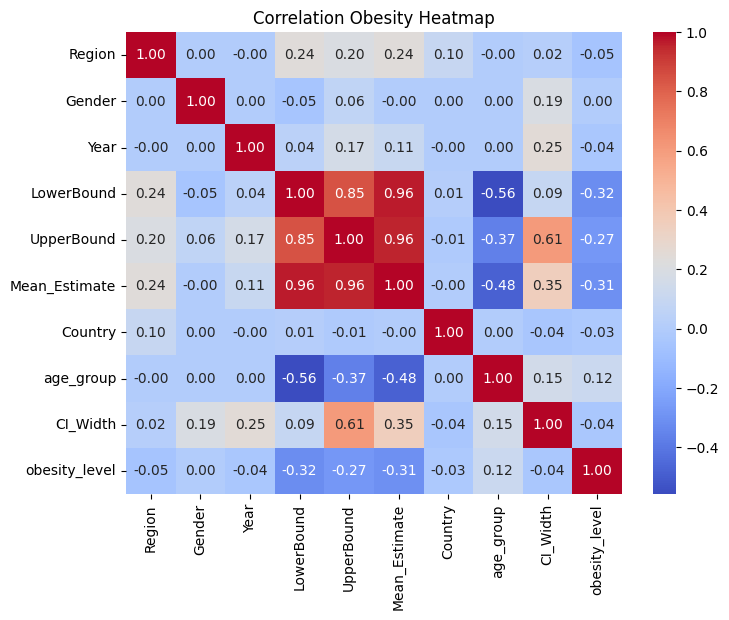

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
corr_obesity = obesity_df_copy.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_obesity, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Obesity Heatmap")
plt.show()

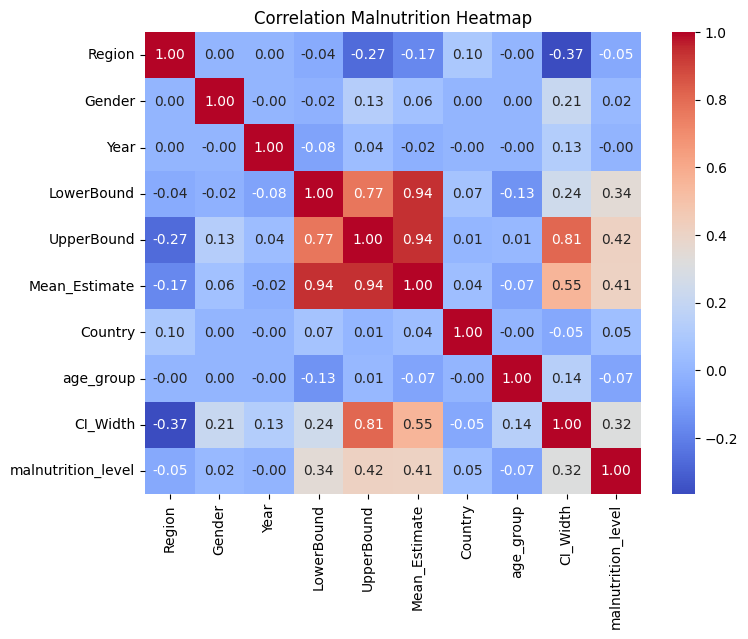

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
corr_malnutrition = malnutrition_df_copy.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_malnutrition, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Malnutrition Heatmap")
plt.show()

# **Pandas - Plotting**

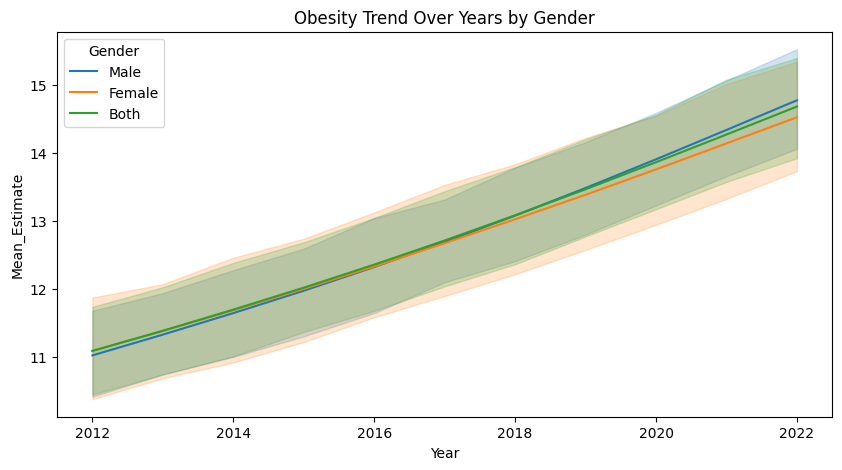

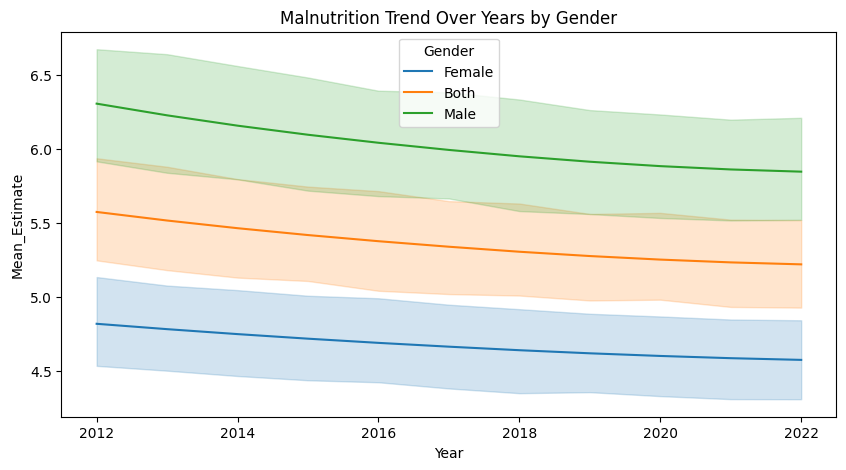

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obesity Trend Over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_obesity_subset_filter, x="Year", y="Mean_Estimate", hue="Gender", estimator="mean")
plt.title("Obesity Trend Over Years by Gender")
plt.show()

# Malnutrition Trend Over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_malnutrition_subset_filter, x="Year", y="Mean_Estimate", hue="Gender", estimator="mean")
plt.title("Malnutrition Trend Over Years by Gender")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


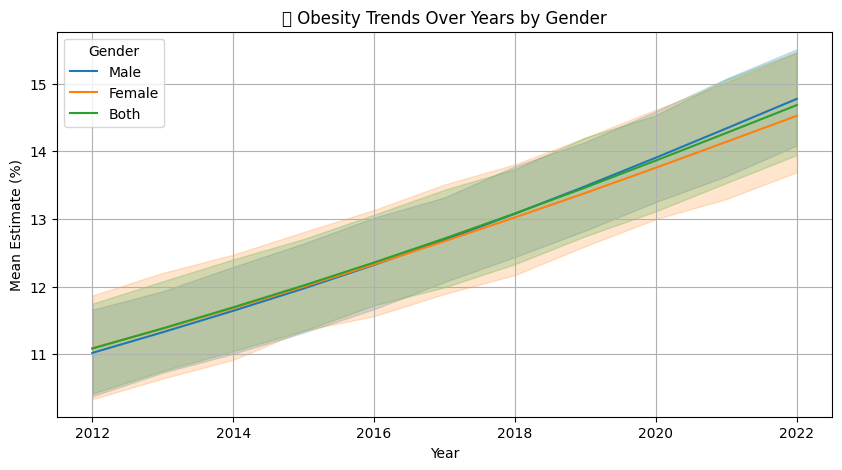

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


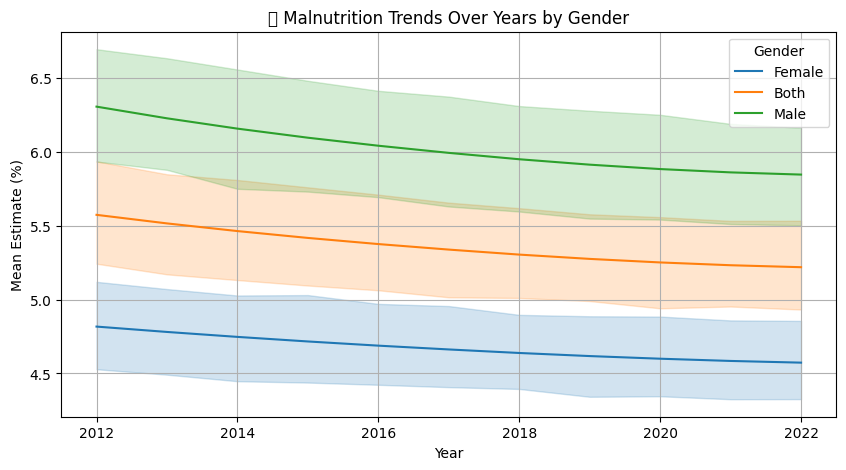

In [ ]:
# Line Plots: Trends Over Time

import seaborn as sns
import matplotlib.pyplot as plt

# Obesity
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_obesity_subset_filter, x="Year", y="Mean_Estimate", hue="Gender", estimator="mean")
plt.title("📈 Obesity Trends Over Years by Gender")
plt.ylabel("Mean Estimate (%)")
plt.grid(True)
plt.show()

# Malnutrition
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_malnutrition_subset_filter, x="Year", y="Mean_Estimate", hue="Gender", estimator="mean")
plt.title("📉 Malnutrition Trends Over Years by Gender")
plt.ylabel("Mean Estimate (%)")
plt.grid(True)
plt.show()

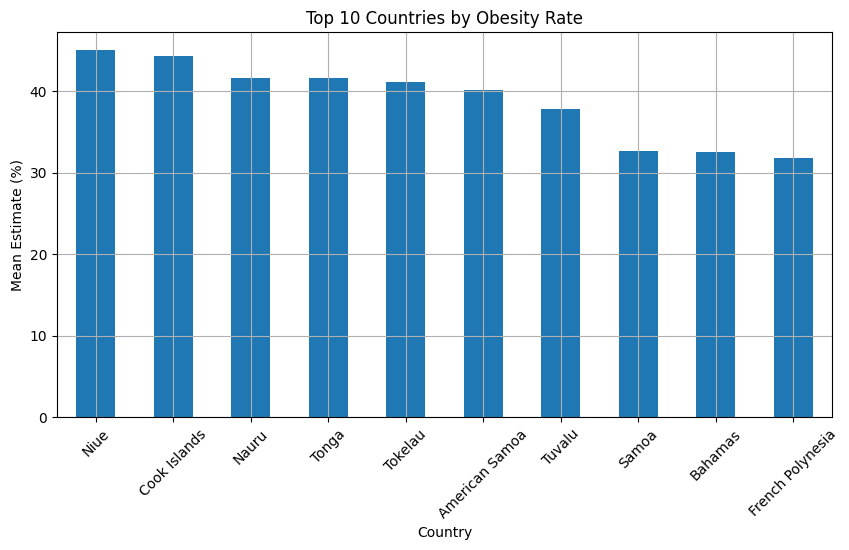

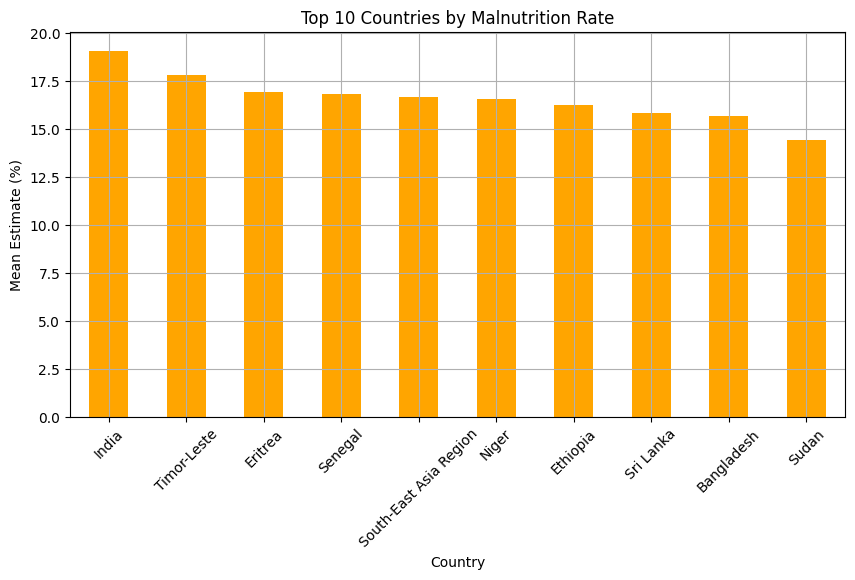

In [ ]:
# Bar Chart: Top 10 Countries by Obesity and Malnutrition (Latest Year)

latest_year = df_obesity_subset_filter["Year"].max()

top_obesity = df_obesity_subset_filter[df_obesity_subset_filter["Year"] == latest_year].groupby("Country")["Mean_Estimate"].mean().nlargest(10)
top_malnutrition = df_malnutrition_subset_filter[df_malnutrition_subset_filter["Year"] == latest_year].groupby("Country")["Mean_Estimate"].mean().nlargest(10)

# Plot
top_obesity.plot(kind="bar", figsize=(10, 5), title="Top 10 Countries by Obesity Rate")
plt.ylabel("Mean Estimate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

top_malnutrition.plot(kind="bar", figsize=(10, 5), color="orange", title="Top 10 Countries by Malnutrition Rate")
plt.ylabel("Mean Estimate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


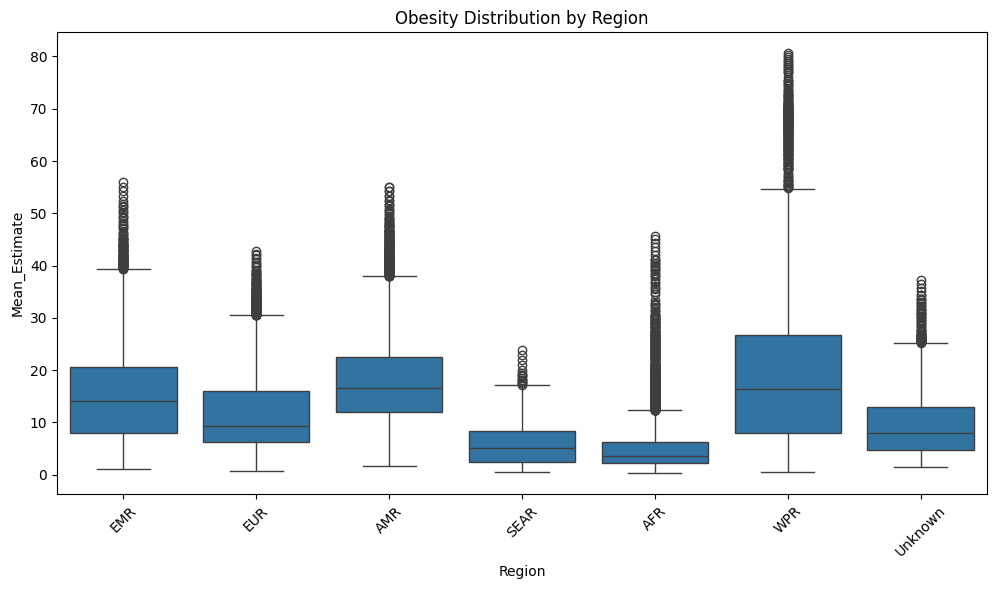

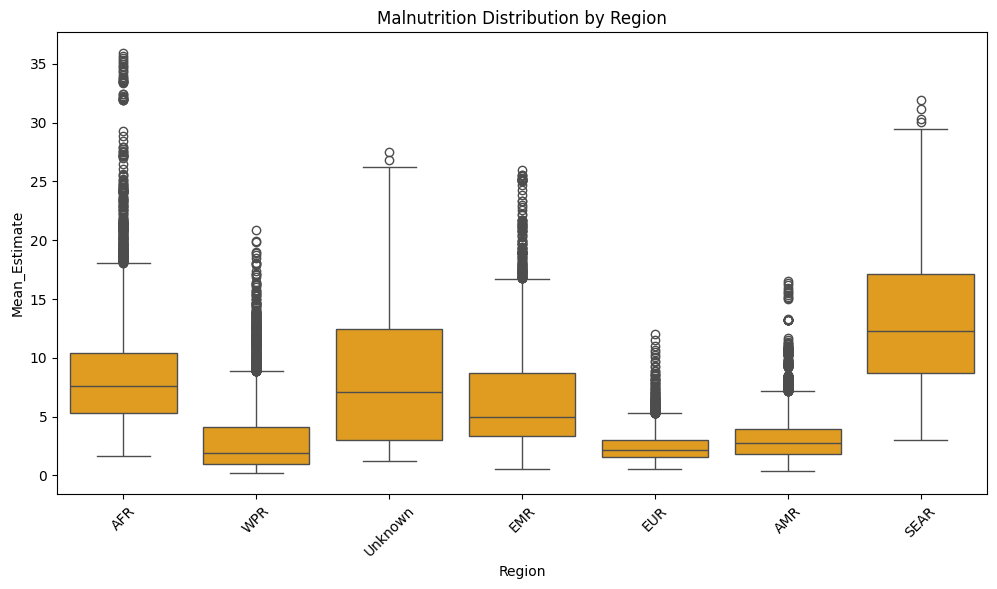

In [ ]:
# Box Plots: Variability by Region

# Obesity
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_obesity_subset_filter, x="Region", y="Mean_Estimate")
plt.title("Obesity Distribution by Region")
plt.xticks(rotation=45)
plt.show()

# Malnutrition
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_malnutrition_subset_filter, x="Region", y="Mean_Estimate", color='orange')
plt.title("Malnutrition Distribution by Region")
plt.xticks(rotation=45)
plt.show()


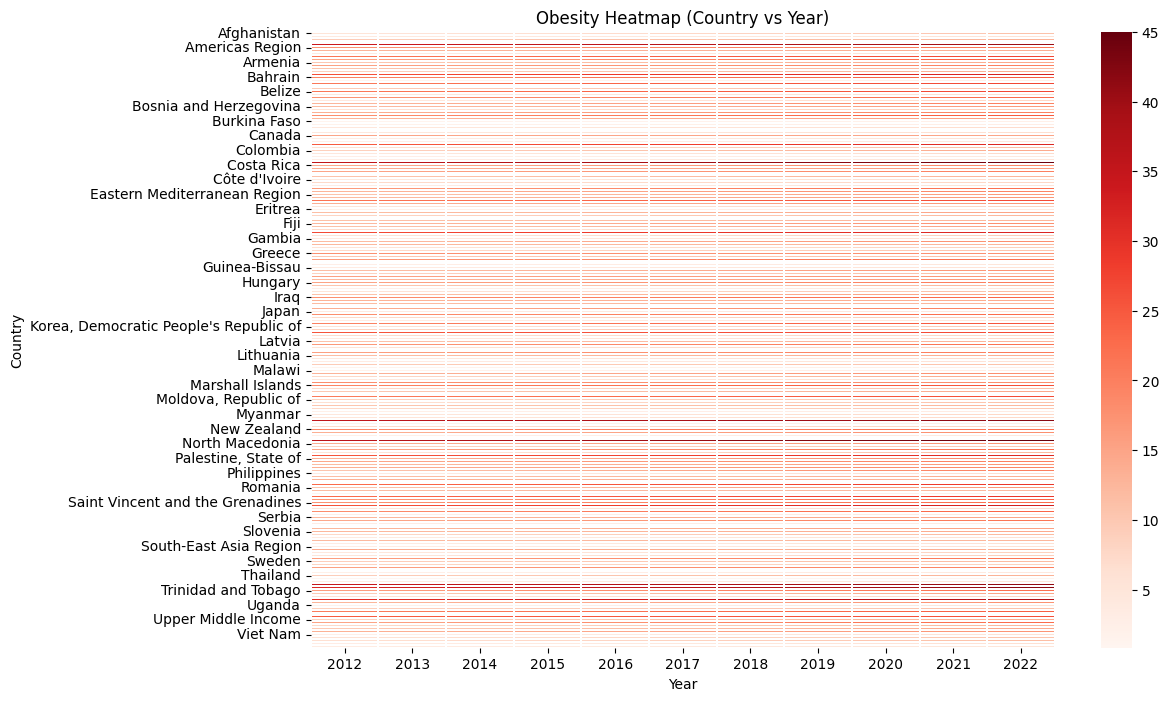

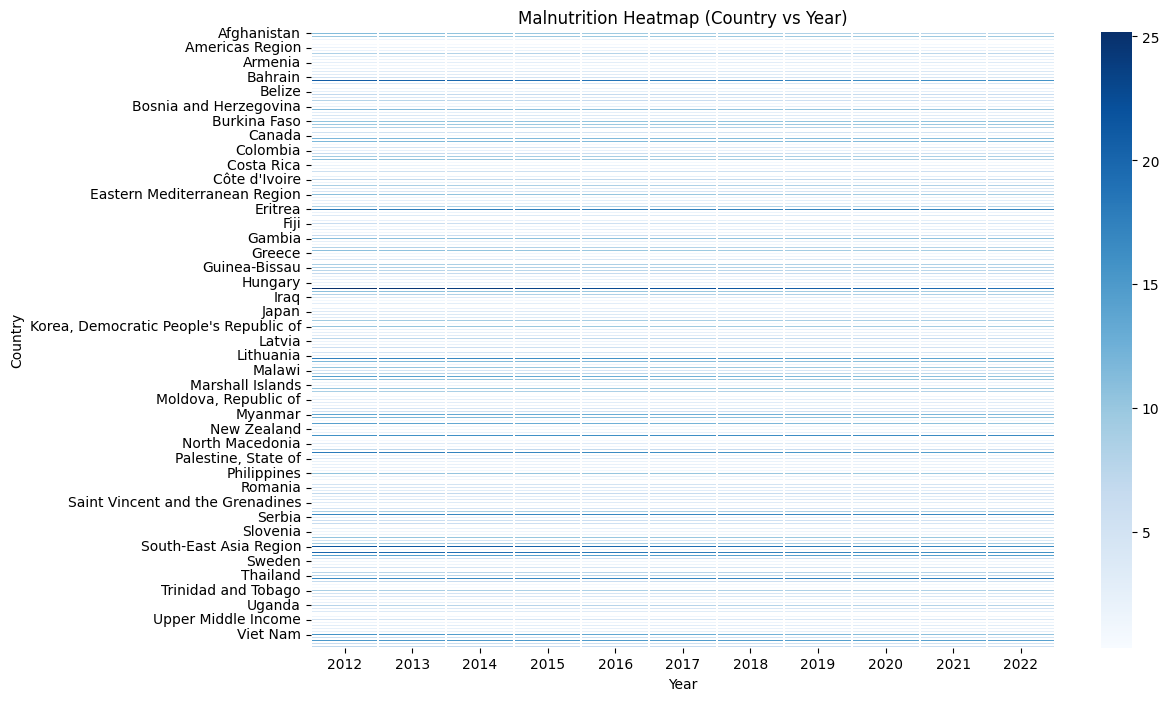

In [ ]:
# Heatmap: Country vs Year

# Pivot tables
pivot_obesity = df_obesity_subset_filter.pivot_table(index="Country", columns="Year", values="Mean_Estimate", aggfunc="mean")
pivot_malnutrition = df_malnutrition_subset_filter.pivot_table(index="Country", columns="Year", values="Mean_Estimate", aggfunc="mean")

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_obesity, cmap="Reds", linewidths=0.1)
plt.title("Obesity Heatmap (Country vs Year)")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_malnutrition, cmap="Blues", linewidths=0.1)
plt.title("Malnutrition Heatmap (Country vs Year)")
plt.show()


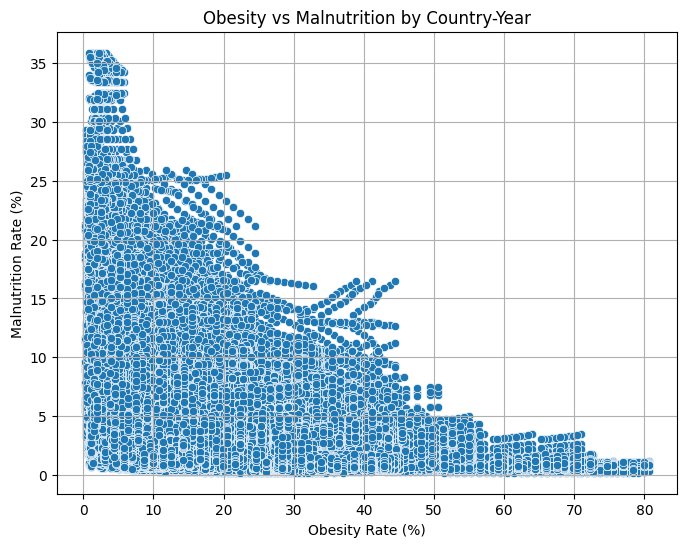

In [ ]:
# Compare Obesity vs Malnutrition (Same Country-Year)

# Merge for comparison
df_compare = pd.merge(
    df_obesity_subset_filter[["Country", "Year", "Mean_Estimate"]],
    df_malnutrition_subset_filter[["Country", "Year", "Mean_Estimate"]],
    on=["Country", "Year"],
    suffixes=("_Obesity", "_Malnutrition")
)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_compare, x="Mean_Estimate_Obesity", y="Mean_Estimate_Malnutrition")
plt.title("Obesity vs Malnutrition by Country-Year")
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Malnutrition Rate (%)")
plt.grid(True)
plt.show()


# **✅ Step 4: Insert Data into SQL (SQLite Example)**

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 52.8 MB/s eta 0:00:00


In [ ]:
import mysql.connector

conn = mysql.connector.connect(
    host="gateway01.us-east-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2RF9f3Nuh4kLJBe.root",
    password="3nvycLptvyoI59Us",
)
cursor = conn.cursor()

In [ ]:
cursor.execute("CREATE DATABASE IF NOT EXISTS Health_Database")
cursor.execute("USE Health_Database")

In [ ]:
#  1. Create SQLite Database

# This creates a file called 'health_data.db' in your current directory
#conn = sqlite3.connect("health_database.db")
#cursor = conn.cursor()

In [ ]:
#  2. Create Tables: obesity and malnutrition

# Create obesity table
cursor.execute("""
CREATE TABLE IF NOT EXISTS obesity (
    Region TEXT,
    Country TEXT,
    Gender TEXT,
    Year INTEGER,
    LowerBound REAL,
    UpperBound REAL,
    Mean_Estimate REAL,
    age_group TEXT,
    CI_Width REAL,
    obesity_level TEXT
)
""")

# Create malnutrition table
cursor.execute("""
CREATE TABLE IF NOT EXISTS malnutrition (
    Region TEXT,
    Country TEXT,
    Gender TEXT,
    Year INTEGER,
    LowerBound REAL,
    UpperBound REAL,
    Mean_Estimate REAL,
    age_group TEXT,
    CI_Width REAL,
    malnutrition_level TEXT
)
""")


In [ ]:
import mysql.connector

conn = mysql.connector.connect(
    host="gateway01.us-east-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2RF9f3Nuh4kLJBe.root",
    password="3nvycLptvyoI59Us",
    database="Health_Database"
)
cursor = conn.cursor()

# Convert DataFrame to list of tuples

obesity_data = [tuple(row) for row in df_obesity_subset_filter.to_numpy()]
malnutrition_data = [tuple(row) for row in df_malnutrition_subset_filter.to_numpy()]

# Insert obesity data
obesity_insert_query = """
INSERT INTO obesity
(Region, Gender, Year, LowerBound, UpperBound, Mean_Estimate, Country, age_group, CI_Width, obesity_level)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
cursor.executemany(obesity_insert_query, obesity_data)

# Insert malnutrition data
malnutrition_insert_query = """
INSERT INTO malnutrition
(Region, Gender, Year, LowerBound, UpperBound, Mean_Estimate, Country, age_group, CI_Width, malnutrition_level)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
cursor.executemany(malnutrition_insert_query, malnutrition_data)

# Commit and close
conn.commit()
cursor.close()
conn.close()


In [ ]:
conn = mysql.connector.connect(
    host="gateway01.us-east-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2RF9f3Nuh4kLJBe.root",
    password="3nvycLptvyoI59Us",
    database="Health_Database"
)
cursor = conn.cursor()

# Read data from the obesity table into a DataFrame
df_obesity_subset_filter = pd.read_sql_query("SELECT * FROM obesity", conn)

# Display the dataframe to verify
display(df_obesity_subset_filter.head())

/tmp/ipython-input-44-2276436033.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_obesity_subset_filter = pd.read_sql_query("SELECT * FROM obesity", conn)


,Region,Country,Gender,Year,LowerBound,UpperBound,Mean_Estimate,age_group,CI_Width,obesity_level
0,EMR,"Iran, Islamic Republic of",Male,2020,15.793777,19.245727,17.487641,Adult,3.451950,Low
1,EMR,Iraq,Male,2020,23.089589,33.815336,28.335530,Adult,10.725747,Moderate
2,EUR,Greenland,Female,2014,24.924766,31.213260,27.948704,Adult,6.288494,Moderate
3,EUR,Armenia,Female,2019,28.160682,35.574925,31.893221,Adult,7.414243,High
4,EUR,Malta,Both,2018,29.905805,37.470856,33.694205,Adult,7.565051,High


In [ ]:
# Load the malnutrition table
df_malnutrition_sql = pd.read_sql_query("SELECT * FROM malnutrition", conn)

# Close the connection when done
conn.close()

# Show first 5 rows
display(df_malnutrition_sql.head())

/tmp/ipython-input-45-3284148492.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_malnutrition_sql = pd.read_sql_query("SELECT * FROM malnutrition", conn)


,Region,Country,Gender,Year,LowerBound,UpperBound,Mean_Estimate,age_group,CI_Width,malnutrition_level
0,AFR,Gabon,Female,2021,3.972036,8.077021,5.795110,Adult,4.104985,Low
1,WPR,Mongolia,Both,2017,2.428230,3.842155,3.090652,Adult,1.413925,Low
2,AFR,Sierra Leone,Female,2016,6.655668,10.253121,8.371724,Adult,3.597453,Low
3,Unknown,South-East Asia Region,Both,2021,12.242323,14.442866,13.336353,Adult,2.200543,Moderate
4,EMR,Qatar,Male,2014,1.253843,3.516819,2.208070,Adult,2.262976,Low


In [ ]:
conn = mysql.connector.connect(
    host="gateway01.us-east-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2RF9f3Nuh4kLJBe.root",
    password="3nvycLptvyoI59Us",
    database="Health_Database"
)
cursor = conn.cursor()

cursor.execute("SELECT COUNT(*) FROM obesity;")
count1 = cursor.fetchone()[0]
print(f"✅ Total records in table: {count1}")

✅ Total records in table: 27720


In [ ]:
cursor.execute("SELECT COUNT(*) FROM malnutrition;")
count2 = cursor.fetchone()[0]
print(f"✅ Total records in table: {count2}")

✅ Total records in table: 27720


**Checking Data type for SQL Queries**

In [ ]:
df_obesity_subset_filter.dtypes

,0
Region,object
Country,object
Gender,object
Year,int64
LowerBound,float64
UpperBound,float64
Mean_Estimate,float64
age_group,object
CI_Width,float64
obesity_level,object


In [ ]:
df_malnutrition_subset_filter.dtypes

,0
Region,object
Gender,object
Year,int64
LowerBound,float64
UpperBound,float64
Mean_Estimate,float64
Country,object
age_group,object
CI_Width,float64
malnutrition_level,object


🧋 Obesity Table (10 Queries)
1. Top 5 regions with the highest average obesity levels in the most recent year(2022)
2. Top 5 countries with highest obesity estimates
3. Obesity trend in India over the years(Mean_estimate)
4. Average obesity by gender
5. Country count by obesity level category and age group
6. Top 5 countries least reliable countries(with highest CI_Width) and Top 5 most
consistent countries (smallest average CI_Width)
7. Average obesity by age group
8. Top 10 Countries with consistent low obesity (low average + low CI)over the years
9. Countries where female obesity exceeds male by large margin (same year)
10. Global average obesity percentage per year


In [ ]:
import mysql.connector

conn = mysql.connector.connect(
    host="gateway01.us-east-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2RF9f3Nuh4kLJBe.root",
    password="3nvycLptvyoI59Us",
    database="Health_Database"
)
cursor = conn.cursor()


def show_query(query):
    df = pd.read_sql_query(query, conn)
    display(df)

In [ ]:
# 1. Top 5 regions with the highest average obesity in 2022

query1 = ("""
SELECT Region, AVG(Mean_Estimate) AS avg_obesity
FROM obesity
WHERE Year = 2022
GROUP BY Region
ORDER BY avg_obesity DESC
LIMIT 5;
""")

show_query(query1)


/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Region,avg_obesity
0,WPR,23.009388
1,AMR,21.213601
2,EMR,18.126910
3,EUR,12.987338
4,Unknown,11.462648


In [ ]:
# 2. Top 5 countries with highest obesity estimates

query2 = ("""
SELECT Country, MAX(Mean_Estimate) AS max_obesity
FROM obesity
GROUP BY Country
ORDER BY max_obesity DESC
LIMIT 5;
""")
show_query(query2)


/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Country,max_obesity
0,American Samoa,80.609250
1,Tonga,79.053253
2,Samoa,72.615880
3,Tokelau,72.486657
4,Cook Islands,71.513951


In [ ]:
# 3. Obesity trend in India over the years

query3 = ("""
SELECT Year, Mean_Estimate
FROM obesity
WHERE Country = 'India'
ORDER BY Year;
""")
show_query(query3)


/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Year,Mean_Estimate
0,2012,1.835492
1,2012,2.203592
2,2012,2.167896
3,2012,1.468947
4,2012,1.094850
...,...,...
127,2022,5.438786
128,2022,3.029781
129,2022,5.196033
130,2022,2.374715


In [ ]:
# 4. Average obesity by gender

query4 = ("""
SELECT Gender, AVG(Mean_Estimate) AS avg_obesity
FROM obesity
GROUP BY Gender;
""")
show_query(query4)


/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Gender,avg_obesity
0,Both,12.781969
1,Female,12.724456
2,Male,12.776696


In [ ]:
# 5. Country count by obesity level and age group

query5 = ("""
SELECT Country, age_group, COUNT(*) AS country_count
FROM obesity
GROUP BY Country, age_group;
""")
show_query(query5)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Country,age_group,country_count
0,Tonga,Child,99
1,Saint Kitts and Nevis,Child,99
2,Luxembourg,Adult,33
3,Puerto Rico,Child,99
4,Benin,Adult,33
...,...,...,...
415,Marshall Islands,Child,99
416,Japan,Child,99
417,China,Child,99
418,Belize,Child,99


In [ ]:
# 6. Most/least reliable countries by CI width

query6 = ("""
SELECT Country, AVG(CI_Width) AS avg_ci_width
FROM obesity
GROUP BY Country
ORDER BY avg_ci_width ASC
LIMIT 5;
""")
show_query(query6)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Country,avg_ci_width
0,Global,0.708953
1,Low & Middle Income,0.861060
2,South-East Asia Region,1.017775
3,India,1.140133
4,Japan,1.155903


In [ ]:
# -- Top 5 most consistent (lowest average CI_Width)
query7 = ("""
SELECT Country, AVG(CI_Width) AS avg_CI_Width
FROM obesity
GROUP BY Country
ORDER BY avg_CI_Width ASC
LIMIT 5;
""")
show_query(query7)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Country,avg_CI_Width
0,Global,0.708953
1,Low & Middle Income,0.861060
2,South-East Asia Region,1.017775
3,India,1.140133
4,Japan,1.155903


In [ ]:
# 7. Average obesity by age group

query8 = ("""
SELECT age_group, AVG(Mean_Estimate) AS avg_obesity
FROM obesity
GROUP BY age_group;
""")
show_query(query8)


/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,age_group,avg_obesity
0,Child,9.736979
1,Adult,21.833223


In [ ]:
# 8. Top 10 countries with consistently low obesity (low average + low CI)

query9 = ("""
SELECT Country, AVG(Mean_Estimate) AS avg_obesity, AVG(CI_Width) AS avg_ci_width
FROM obesity
GROUP BY Country
ORDER BY avg_obesity;
""")
show_query(query9)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Country,avg_obesity,avg_ci_width
0,Timor-Leste,0.994067,1.273569
1,Ethiopia,1.491994,1.589414
2,Burkina Faso,1.721496,1.531514
3,Rwanda,1.767194,2.360579
4,Bangladesh,1.976673,1.663506
...,...,...,...
205,American Samoa,36.892015,23.113530
206,Tokelau,37.960966,20.451204
207,Nauru,38.512101,17.775355
208,Cook Islands,39.917173,15.140721


In [ ]:
# 9. Countries where female obesity exceeds male by large margin (same year)

query10 = ("""
SELECT o.Year, o.Country, o.Mean_Estimate
FROM obesity o
JOIN (
    SELECT Year, AVG(Mean_Estimate) AS avg_male
    FROM obesity
    WHERE Gender = 'Male'
    GROUP BY Year
) male_avg
ON o.Year = male_avg.Year
WHERE o.Gender = 'Female' AND o.Mean_Estimate > male_avg.avg_male
ORDER BY o.Year, o.Mean_Estimate DESC;
""")
show_query(query10)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Year,Country,Mean_Estimate
0,2012,American Samoa,76.983809
1,2012,Tonga,70.945138
2,2012,Nauru,68.267238
3,2012,Tokelau,67.809904
4,2012,Cook Islands,66.351807
...,...,...,...
3245,2022,Algeria,14.834040
3246,2022,Australia,14.829297
3247,2022,Cyprus,14.818232
3248,2022,Dominican Republic,14.805530


In [ ]:
# 10. Global average obesity percentage per year

query11 = ("""
SELECT Year, AVG(Mean_Estimate) AS avg_obesity
FROM obesity
GROUP BY Year;
""")
show_query(query11)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Year,avg_obesity
0,2015,11.994231
1,2022,14.662533
2,2018,13.060296
3,2014,11.670343
4,2020,13.843002
5,2017,12.689997
6,2021,14.250923
7,2019,13.444604
8,2016,12.333907
9,2013,11.359637


Malnutrition Table (10 Queries)
1. Avg. malnutrition by age group
2. Top 5 countries with highest malnutrition(mean_estimate)
3. Malnutrition trend in African region over the years
4. Gender-based average malnutrition
5. Malnutrition level-wise (average CI_Width by age group)
6. Yearly malnutrition change in specific countries(India, Nigeria, Brazil)
7. Regions with lowest malnutrition averages
8. Countries with increasing malnutrition (💡 Hint: Use MIN() and MAX()
on Mean_Estimate per country to compare early vs. recent malnutrition levels,
and filter where the difference is positive using HAVING.)
9. Min/Max malnutrition levels year-wise comparison
10. High CI_Width flags for monitoring(CI_width > 5)

In [ ]:
# 1. Average malnutrition by age group

query1 = ("""
SELECT age_group, AVG(Mean_Estimate) AS avg_malnutrition
FROM malnutrition
GROUP BY age_group;
""")
show_query(query1)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,age_group,avg_malnutrition
0,Adult,5.940619
1,Child,5.159062


In [ ]:
# 2. Top 5 countries with highest malnutrition (Mean_Estimate)

query2 = ("""
SELECT Country, AVG(Mean_Estimate) AS avg_malnutrition
FROM malnutrition
GROUP BY Country
ORDER BY avg_malnutrition DESC
LIMIT 5;
""")
show_query(query2)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Country,avg_malnutrition
0,India,22.142361
1,South-East Asia Region,19.238903
2,Bangladesh,18.245768
3,Sri Lanka,17.871907
4,Eritrea,17.472508


In [ ]:
# 3. Malnutrition trend in African region over the years

query3 = ("""
SELECT Year, AVG(Mean_Estimate) AS avg_malnutrition
FROM malnutrition
WHERE Region = 'Africa'
GROUP BY Year;
""")
show_query(query3)


/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Year,avg_malnutrition


In [ ]:
# 4. Gender-based average malnutrition

query4 = ("""
SELECT Gender, AVG(Mean_Estimate) AS avg_malnutrition
FROM malnutrition
GROUP BY Gender;
""")
show_query(query4)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Gender,avg_malnutrition
0,Male,6.026317
1,Female,4.675483
2,Both,5.361553


In [ ]:
# 5. Malnutrition level-wise: average CI_Width by age group

query5 = ("""
SELECT age_group, AVG(CI_Width) AS avg_ci_width
FROM malnutrition
GROUP BY age_group;
""")
show_query(query5)


/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,age_group,avg_ci_width
0,Adult,3.693780
1,Child,5.103133


In [ ]:
# 6. Yearly malnutrition change in India, Nigeria, and Brazil

query6 = ("""
SELECT Year, Mean_Estimate
FROM malnutrition
WHERE Country IN ('India', 'Nigeria', 'Brazil')
ORDER BY Year;
""")
show_query(query6)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Year,Mean_Estimate
0,2012,26.409665
1,2012,21.997698
2,2012,21.280138
3,2012,26.850277
4,2012,26.289803
...,...,...
391,2022,2.635281
392,2022,20.203404
393,2022,2.754620
394,2022,9.408734


In [ ]:
# 7. Regions with lowest malnutrition averages

query7 = ("""
SELECT Region, AVG(Mean_Estimate) AS avg_malnutrition
FROM malnutrition
GROUP BY Region
ORDER BY avg_malnutrition ASC
LIMIT 5;
""")
show_query(query7)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Region,avg_malnutrition
0,EUR,2.426759
1,AMR,3.174752
2,WPR,3.220453
3,EMR,6.661349
4,Unknown,8.354200


In [ ]:
# 8. Countries with increasing malnutrition

query8 = ("""
SELECT Country, MIN(Mean_Estimate) AS min_malnutrition, MAX(Mean_Estimate) AS max_malnutrition
FROM malnutrition
GROUP BY Country
HAVING min_malnutrition < max_malnutrition;
""")
show_query(query8)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Country,min_malnutrition,max_malnutrition
0,Azerbaijan,1.544799,6.551031
1,China,2.731146,7.359331
2,Georgia,1.492612,3.959535
3,Sierra Leone,2.731019,9.853715
4,Portugal,0.707810,2.981438
...,...,...,...
205,Zambia,3.048685,12.365415
206,Qatar,1.536281,7.508013
207,Peru,0.825172,1.985275
208,Greenland,0.918012,3.525798


In [ ]:
# 9. Min/Max malnutrition levels year-wise comparison

query9 = ("""
SELECT Year, MIN(Mean_Estimate) AS min_malnutrition, MAX(Mean_Estimate) AS max_malnutrition
FROM malnutrition
GROUP BY Year;
""")
show_query(query9)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Year,min_malnutrition,max_malnutrition
0,2021,0.184717,34.429225
1,2019,0.180428,34.715995
2,2018,0.179796,34.856236
3,2022,0.188174,34.261948
4,2015,0.178445,35.312954
5,2016,0.178804,35.147691
6,2020,0.181989,34.578446
7,2017,0.179286,34.997904
8,2014,0.177772,35.498199
9,2013,0.176421,35.694364


In [ ]:
# 10. High CI_Width flags for monitoring (CI_Width > 5)

query10 = ("""
SELECT *
FROM malnutrition
WHERE CI_Width > 5
ORDER BY CI_Width DESC;
""")
show_query(query10)

Combined (5 Queries)
1. Obesity vs malnutrition comparison by country(any 5 countries)
2. Gender-based disparity in both obesity and malnutrition
3. Region-wise avg estimates side-by-side(Africa and America)
4. Countries with obesity up & malnutrition down
5. Age-wise trend analysis

In [ ]:
#  1. Obesity vs. Malnutrition by Country (any 5 countries)

query1 = ("""
SELECT o.Country,
       AVG(o.Mean_Estimate) AS avg_obesity,
       AVG(m.Mean_Estimate) AS avg_malnutrition
FROM obesity o
JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year
WHERE o.Country IN ('India', 'USA', 'Nigeria', 'Brazil', 'China')
GROUP BY o.Country;
""")
show_query(query1)

/tmp/ipython-input-52-1301946522.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,Country,avg_obesity,avg_malnutrition
0,Brazil,16.613028,2.685355
1,China,8.621579,4.319780
2,Nigeria,4.467604,11.889187
3,India,3.429781,22.142361


In [ ]:
#  2. Gender-based disparity in Obesity and Malnutrition

query2 = ("""
SELECT o.Gender,
       AVG(o.Mean_Estimate) AS avg_obesity,
       AVG(m.Mean_Estimate) AS avg_malnutrition
FROM obesity o
JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year
""")
show_query(query2)

In [ ]:
#  3. Region-wise avg estimates side-by-side (Africa and America)

query3 = ("""
SELECT o.Region,
       AVG(o.Mean_Estimate) AS avg_obesity,
       AVG(m.Mean_Estimate) AS avg_malnutrition
FROM obesity o
JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year
""")
show_query(query3)

In [ ]:
# 4. Countries with obesity increasing and malnutrition decreasing

query4 = ("""

SELECT o.Country, o.Year, o.Mean_Estimate AS obesity_estimate, m.Mean_Estimate AS malnutrition_estimate
FROM obesity o
JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year

""")
show_query(query4)

In [ ]:
# 5. Age-wise trend analysis (both conditions)

query5 = ("""

SELECT o.age_group, o.Year, o.Mean_Estimate AS obesity_estimate, m.Mean_Estimate AS malnutrition_estimate
FROM obesity o
JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year

""")
show_query(query5)

# **Streamlit**

In [ ]:
%%writefile streamlit_app.py
# streamlit_app.py
import streamlit as st
import sqlite3
import pandas as pd
import plotly.express as px

st.set_page_config(layout="wide")

# Connect to SQLite DB
def get_db_connection():
    return sqlite3.connect("health_database.db")

# Execute SQL Query
def run_query(query):
    conn = get_db_connection()
    try:
        df = pd.read_sql(query, conn)
        return df
    except Exception as e:
        st.error(f"Error executing query: {e}")
        return None
    finally:
        conn.close()

# Sidebar Navigation
st.sidebar.title("🌠 Nutrition Dashboard Menu")
page = st.sidebar.radio("Navigate", ["Home", "Filter Criteria", "Queries", "About"])

# Query Lists
Obesity_Table_questions = [
    "1. Top 5 regions with the highest average obesity levels in the most recent year(2022)",
    "2. Top 5 countries with highest obesity estimates",
    "3. Obesity trend in India over the years(Mean_estimate)",
    "4. Average obesity by gender",
    "5. Country count by obesity level category and age group",
    "6. Top 5 countries least reliable countries(with highest CI_Width) and Top 5 most consistent countries (smallest average CI_Width)",
    "7. Average obesity by age group",
    "8. Top 10 Countries with consistent low obesity (low average + low CI)over the years",
    "9. Countries where female obesity exceeds male by large margin (same year)",
    "10. Global average obesity percentage per year"
]

Obesity_queries = [
      "SELECT Region, AVG(Mean_Estimate) AS avg_obesity FROM obesity WHERE Year = 2022 GROUP BY Region ORDER BY avg_obesity DESC LIMIT 5;",
      "SELECT Country, MAX(Mean_Estimate) AS max_obesity FROM obesity GROUP BY Country ORDER BY max_obesity DESC LIMIT 5;",
      "SELECT Year, Mean_Estimate FROM obesity WHERE Country = 'India' ORDER BY Year;",
      "SELECT Gender, AVG(Mean_Estimate) AS avg_obesity FROM obesity GROUP BY Gender;",
      "SELECT Country, age_group, COUNT(*) AS country_count FROM obesity GROUP BY Country, age_group;",
      "SELECT Country, AVG(CI_Width) AS avg_ci_width FROM obesityGROUP BY Country ORDER BY avg_ci_width ASC LIMIT 5;",
      "SELECT Country, AVG(CI_Width) AS avg_CI_Width FROM obesity GROUP BY Country ORDER BY avg_CI_Width ASC LIMIT 5;",
      "SELECT age_group, AVG(Mean_Estimate) AS avg_obesity FROM obesity GROUP BY age_group;",
      "SELECT Country, AVG(Mean_Estimate) AS avg_obesity, AVG(CI_Width) AS avg_ci_width FROM obesity GROUP BY Country ORDER BY avg_obesity;",
      "SELECT Year, Country, Mean_Estimate FROM obesity WHERE Gender = 'Female' AND Mean_Estimate > (SELECT Mean_Estimate FROM obesity WHERE Gender = 'Male' AND Year = obesity.Year)ORDER BY Year, Mean_Estimate DESC;",
      ]

my_queries = [
    "16. Find asteroids with an average speed > 40,000 km/h",
    "17. Calculate average miss distance for each asteroid",
    "18. List top 5 largest potentially hazardous asteroids",
    "19. Find asteroids that approached Earth exactly once",
    "20. Average size (diameter) of hazardous vs. non-hazardous asteroids",
    "21. Asteroids with multiple approaches on the same day",
    "22. All asteroids that have never been hazardous",
    "23. Day with most asteroid approaches",
    "24. Asteroids that only approached Earth in 2025",
    "25. Asteroid with most total approaches"
]

my_queries_list = [
    "SELECT a.name, AVG(ca.relative_velocity_kmph) AS avg_velocity FROM asteroids a JOIN close_approach ca ON a.id = ca.neo_reference_id GROUP BY a.id HAVING avg_velocity > 40000;",
    "SELECT neo_reference_id, AVG(miss_distance_km) AS avg_miss_distance_km FROM close_approach GROUP BY neo_reference_id;",
    "SELECT name, estimated_dia_min_km FROM asteroids WHERE is_potentially_hazardous = 1 ORDER BY estimated_dia_min_km DESC LIMIT 5;",
    "SELECT a.name FROM asteroids a JOIN close_approach ca ON a.id = ca.neo_reference_id GROUP BY a.id HAVING COUNT(*) = 1;",
    "SELECT is_potentially_hazardous, AVG((estimated_dia_min_km + estimated_dia_max_km) / 2) AS avg_diameter_km FROM asteroids GROUP BY is_potentially_hazardous;",
    "SELECT neo_reference_id, close_approach_date, COUNT(*) AS approaches FROM close_approach GROUP BY neo_reference_id, close_approach_date HAVING approaches > 1;",
    "SELECT id, name FROM asteroids WHERE is_potentially_hazardous = 0;",
    "SELECT close_approach_date, COUNT(*) AS total_approaches FROM close_approach GROUP BY close_approach_date ORDER BY total_approaches DESC LIMIT 1;",
    "SELECT DISTINCT a.name FROM asteroids a JOIN close_approach ca ON a.id = ca.neo_reference_id WHERE strftime('%Y', ca.close_approach_date) = '2025';",
    "SELECT neo_reference_id, COUNT(*) AS total_approaches FROM close_approach GROUP BY neo_reference_id ORDER BY total_approaches DESC LIMIT 1;"
]

# === Page Logic ===
st.title("☄️ Asteroid Insights Explorer")

if page == "Home":
    st.header("Welcome to the Asteroid Data Dashboard")

    col1, col2 = st.columns([2,2])  # Wider text column on the left

    with col1:
        st.markdown("""
        ### 🚀 Explore NASA's Near-Earth Object Data
        This dashboard allows you to:
        - View asteroids' close approaches
        - Explore their speeds, sizes, and distances
        - Check which are potentially hazardous
        - Download filtered results for further analysis

        Navigate using the sidebar to run queries or apply custom filters.
        """)

    with col2:
        st.image("/content/170275-843069693_tiny.jpg")

elif page == "Filter Criteria":
    st.header("Filter Criteria")
    st.info("Use the filter options below to explore specific asteroid characteristics.")

    col1, col2, col3 = st.columns(3)
    with col1:
        sl_min_magnitude = st.slider("Min Magnitude", 13.80, 32.61, (13.80, 20.34))
    with col2:
        sl_relative_velocity = st.slider("Relative Velocity (km/h)", 1418.21, 173071.83, (1600.00, 50000.00))
    with col3:
        start_date = st.date_input("Start Date")

    col4, col5, col6 = st.columns(3)
    with col4:
        sl_min_estimated_dia_range = st.slider("Min Estimated Diameter (km)", 0.00, 4.62, (1.0, 2.10))
    with col5:
        sl_max_estimated_dia_range = st.slider("Max Estimated Diameter (km)", 0.00, 10.33, (1.0, 6.0))
    with col6:
        end_date = st.date_input("End Date")

    col7, col8 = st.columns(2)
    with col7:
        sl_astronomical_unit = st.slider("Astronomical Unit", 0.00, 0.58, (0.05, 0.48))
    with col8:
        sl_potentially_hazardous = st.selectbox("Is Potentially Hazardous", [0, 1])

    if st.button("Filter"):
        query = f"""
        SELECT a.name, ca.close_approach_date, ca.relative_velocity_kmph, ca.astronomical,
               ca.miss_distance_km, a.absolute_magnitude_h, a.estimated_dia_max_km, a.is_potentially_hazardous
        FROM close_approach ca
        JOIN asteroids a ON a.id = ca.neo_reference_id
        WHERE a.absolute_magnitude_h BETWEEN {sl_min_magnitude[0]} AND {sl_min_magnitude[1]}
          AND a.estimated_dia_min_km BETWEEN {sl_min_estimated_dia_range[0]} AND {sl_min_estimated_dia_range[1]}
          AND a.estimated_dia_max_km BETWEEN {sl_max_estimated_dia_range[0]} AND {sl_max_estimated_dia_range[1]}
          AND ca.relative_velocity_kmph BETWEEN {sl_relative_velocity[0]} AND {sl_relative_velocity[1]}
          AND ca.astronomical BETWEEN {sl_astronomical_unit[0]} AND {sl_astronomical_unit[1]}
          AND a.is_potentially_hazardous = {sl_potentially_hazardous}
          AND date(ca.close_approach_date) BETWEEN '{start_date}' AND '{end_date}'
        """
        df = run_query(query)
        if df is not None and not df.empty:
            st.dataframe(df, use_container_width=True)
            fig = px.histogram(df, x="relative_velocity_kmph", title="Velocity Distribution")
            st.plotly_chart(fig, use_container_width=True)
            st.download_button("Download CSV", df.to_csv(index=False), "filtered_results.csv")
        else:
            st.warning("No matching data found for selected criteria.")

elif page == "Queries":
    st.header("Predefined SQL Queries")
    category = st.radio("Choose Query Type", ["Guvi Queries", "My Queries"])
    if category == "Guvi Queries":
        desc = st.selectbox("Select Query:", guvi_questions)
        query = guvi_queries[guvi_questions.index(desc)]
    else:
        desc = st.selectbox("Select Query:", my_queries)
        query = my_queries_list[my_queries.index(desc)]

    if st.button("Run Query"):
        df = run_query(query)
        if df is not None and not df.empty:
            st.subheader(desc)
            st.dataframe(df, use_container_width=True)
            numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
            if len(numeric_cols) > 0:
                col = st.selectbox("Select column to plot", numeric_cols)
                fig = px.bar(df, x=df.columns[0], y=col, title="Visual Representation")
                st.plotly_chart(fig, use_container_width=True)
        else:
            st.warning("No data found or query failed.")

elif page == "About":
    st.header("About This App")
    st.write("Built using Streamlit, this app allows exploration of near-Earth asteroid data with SQL and interactive charts.")
    st.write("Data Collected through Nasa API Link")
    st.write("**Project Given by Guvi**")
    st.write("**Thank you for visit**")


st.markdown("---")
st.caption("Developed by Arun Kumar | Powered by NASA NEO Data")
